# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [22]:
dataset = {"İsim": ["Mert", "Nilay", "Dogancan", "Omer", "Merve", "Onur"],
          "Soyad": ["Cobanov", "Mertal", "Mavideniz", "Cengiz", "Noyan", "Sahil"],
          "Yas": [24, 22, 24, 23, "bilinmiyor", 23],
          "Sehir": ["Bursa", "Ankara", "Istanbul", np.nan, "Izmir", "Istanbul"],
          "Ulke": ["Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye", "Turkiye"],
          "GANO": [np.nan, np.nan, np.nan, np.nan, 3.90, np.nan]}

df = pd.DataFrame(dataset)
df

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24,Bursa,Turkiye,NaN
1,Nilay,Mertal,22,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23,NaN,Turkiye,NaN
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye,3.9
5,Onur,Sahil,23,Istanbul,Turkiye,NaN


# 1. Adım: Büyük resime bakın!

Her şeyden önce, bir preprocessing işlemine başlarken, veri tiplerine, satır-sütün sayılarına, eksik verilere ve genel şemaya bakarak başlamalısınız. Burada `<DataFrame>.info()` fonksiyonu ile bir önbilgi alınabilir.

 - İlk dikkatimi çeken unsur `Yas` kolonunun integer olması yerine object olması. Dataframe'e dönüp baktığımda yaşlardan birinin bilinmiyor olarak kodlandığını görüyorum. Eğer sayılardan oluşan bir kolonda farklı bir datatype varsa, pandas bunun object olarak algılayacaktır.
 - Dikkatimi çeken diğer bir unsur `Sehir` ve `GANO` kolonundaki eksik değerler, bunların halledilmesi gerekecek.
 - Toplam 6 satır olmasına rağmen `GANO` kolonunda sadece tek bir değer görebiliyorum, burada bu kolonu tamamen kaldırmak mantıklı olacağını düşünüyorum.
 - Ulke kolonundaki tüm değerler aynı, bu yüzden kaldırabiliriz.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   İsim    6 non-null      object 
 1   Soyad   6 non-null      object 
 2   Yas     6 non-null      object 
 3   Sehir   5 non-null      object 
 4   Ulke    6 non-null      object 
 5   GANO    1 non-null      float64
dtypes: float64(1), object(5)
memory usage: 416.0+ bytes


## NaN kontrolü
**NaN** değerleri saydırarak kontrol edelim. Eğer bir kez `.sum()` fonksiyonunu çağırırsam, kolon bazında toplayacaktır, eğer bir kez daha çağırırsam, eksik değerlerimin toplamını da görebilirim.

In [7]:
df.isna().sum()

İsim     0
Soyad    0
Yas      0
Sehir    1
Ulke     0
GANO     5
dtype: int64

In [8]:
df.isna().sum().sum() #df'de toplam kaç adet NaN value var?

6

# 2. Adım: Manipülasyona Başlayın!

## Bilgi içermeyen kolonların kaldırılması

GANO ve Ulke satırlarının kaldırılmasına karar vermiştik, bunu yapabileceğimiz iki yöntem var: 
 - Önkabul olarak, eğer kolonlar belirli bir eşik değerinin üzerinde *NaN* değer içerdiğinde kaldırmak istiyorsanız
 - Seçtiğiniz kolonları manuel olarak kaldırmak istiyorsanız

In [10]:
# 1. Yöntem
df.dropna(axis=1, how="any", thresh=3) # 3 taneden fazla NaN değeri içeren column'u kaldıracak.
# GANO column'u kaldırıldı.

,İsim,Soyad,Yas,Sehir,Ulke
0,Mert,Cobanov,24,Bursa,Turkiye
1,Nilay,Mertal,22,Ankara,Turkiye
2,Dogancan,Mavideniz,24,Istanbul,Turkiye
3,Omer,Cengiz,23,NaN,Turkiye
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye
5,Onur,Sahil,23,Istanbul,Turkiye


In [13]:
# 2. Yöntem
df.drop(labels=["GANO"], axis=1)
# Eğer aynı dataframe'inize direk uygulamak istiyorsanız inplace parametresine True değerini verin.
# df.drop(labels=["GANO"], axis=1, inplace=True)

,İsim,Soyad,Yas,Sehir,Ulke
0,Mert,Cobanov,24,Bursa,Turkiye
1,Nilay,Mertal,22,Ankara,Turkiye
2,Dogancan,Mavideniz,24,Istanbul,Turkiye
3,Omer,Cengiz,23,NaN,Turkiye
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye
5,Onur,Sahil,23,Istanbul,Turkiye


Ayrıca unutmadan Ulke satırındaki her değer aynı olduğu için modelimizin buna ihtiyacı olmayacak.

In [19]:
df

,İsim,Soyad,Yas,Sehir,Ulke,GANO
0,Mert,Cobanov,24,Bursa,Turkiye,NaN
1,Nilay,Mertal,22,Ankara,Turkiye,NaN
2,Dogancan,Mavideniz,24,Istanbul,Turkiye,NaN
3,Omer,Cengiz,23,NaN,Turkiye,NaN
4,Merve,Noyan,bilinmiyor,Izmir,Turkiye,3.9
5,Onur,Sahil,23,Istanbul,Turkiye,NaN


In [34]:
#df.drop(columns=["GANO", "Ulke"], inplace=True) #bu kez labels yerine columns kullandık.

df_2 = df.drop(columns=["GANO", "Ulke"])
#inplace kullanmadan degisiklik yapılmış halini başka bir degiskene tanımlayabiliriz.

In [35]:
df_2 #GANO ve Ulke column'ları gitti.

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24,Bursa
1,Nilay,Mertal,22,Ankara
2,Dogancan,Mavideniz,24,Istanbul
3,Omer,Cengiz,23,NaN
4,Merve,Noyan,bilinmiyor,Izmir
5,Onur,Sahil,23,Istanbul


## Eksik değerlerin halledilmesi
Eksik değerlerin halledilmesiyle ilgili basit ve daha kompleks yöntemler var, burada amaç verisetimizde dezenformasyon yaratmadan bu problemlerin halledilmesi olmalı. Özellikle ML algoritmaları eksik verilere uyumlu değiller, bu yüzden ön işleme esnasında kritik konulardan birisini bu kısım oluşturuyor. 

Konunun önem derecesi arttıkça yaklaşımlarda değişiyor, genel bir yöntem ve herkesin kabul ettiği bir yaklaşım yok fakat size en popüler olanlarını göstermeye çalışacağım. 

Bu verileri direkt olarak kaldırabildiğiniz durumları yukarıda işledik, şimdi gelin kaldırmak istemediğimiz durumlarda neler yapabiliriz bunlara bakalım.

 - Mean, Median, Frequent, Constant
 - Enterpolasyon
 - KNN

### 1. En kolay teknik

#### Manuel

In [36]:
df_2["Yas"]

0            24
1            22
2            24
3            23
4    bilinmiyor
5            23
Name: Yas, dtype: object

In [37]:
df_2["Yas"].replace("bilinmiyor", np.nan, inplace=True)
df_2["Yas"] # ilk önce eksik veriyi NaN formatına çeviriyorum

0    24.0
1    22.0
2    24.0
3    23.0
4     NaN
5    23.0
Name: Yas, dtype: float64

In [31]:
df_2.fillna(value=df_2["Yas"].mean(), inplace=True) # sonrasında o columnun ortalaması ile dolduruyorum
df_2["Yas"]

0    24.0
1    22.0
2    24.0
3    23.0
4    23.2
5    23.0
Name: Yas, dtype: float64

#### Scikit

Scikit ile bu işlem oldukça kolaylaştırılmış, tekniğinize göre 4 yöntem seçebiliyorsunuz.

 - **mean:** Ortalama değer impute edilir.
 - **median:** Medyan impute edilir.
 - **most_frequent:** En çok tekrar eden değer eklenir. 
 - **constant:** sabit bir değer eklenir.

In [39]:
from sklearn.impute import SimpleImputer

In [38]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,NaN,Izmir
5,Onur,Sahil,23.0,Istanbul


In [40]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [41]:
df_2["Yas"] = imp_freq.fit_transform(df_2[["Yas"]])
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


### 2. Enterpolasyon



Bu teknik biraz trickli olabilir, çünkü sürekli olduğunuz bir veride kullanmanız mantıklı olacaktır. Interpolasyon, elinizdeki veri noktalarının arasında bir değeri bilmediğiniz, bu iki değer arasındaki bilinmeyin noktadaki değeri bulmanızı sağlar. Mesela elinizde sıcaklık ile alakalı time-series bir data olduğunu düşünelim burada bir eksik veriniz varsa bu iki nokta arasındaki değeri bulmak için kullanabilirsiniz. Açı/Tork grafiği için verinin frekansını artırmak veya çözünürlük yükseltmek için kullanabilirsiniz.



Interpolasyon için basitçe bir örneğe göz atalım:

 - Sıralı giden bir array'de 2 değerinin eksik olduğunu görüyorsunuz, lineer bir düzlemde 1 ve 3 sayısı arasında 2 olması gerekmektedir. 
 
**Not:** Interpolasyon'u yüksek dereceli polinomlar üzerinde de kullanabilirsiniz.


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Comparison_of_1D_and_2D_interpolation.svg/1280px-Comparison_of_1D_and_2D_interpolation.svg.png width="500" />

In [42]:
s = pd.Series([0, 1, np.nan, 3])

print(s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [43]:
s.interpolate() #interpolasyon ile eksik veriyi doldurduk.

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

### 3. En yakın komşular

Varsayılan olarak, `nan_euclidean_distances` yakın komşuları bulmak için eksik değerleri destekleyen bir öklid mesafesi metriği kullanılır.

Her eksik özelliği,  `n_neighbors` sayısı kadar olan yakın komşuların değerleri kullanılarak bulunur. 

Komşuların özelliklerinin her bir komşuya olan uzaklığının ağırlıklı ortalaması alınır. 

<img src=https://www.edureka.co/blog/wp-content/uploads/2018/07/KNN-Algorithm-k3-edureka-437x300.png width="400" />

In [45]:
from sklearn.impute import KNNImputer

In [46]:
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


In [48]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [49]:
pd.DataFrame(X)

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


# 3. Adım: Eksikleri tamamlayın!

Gördüğünüz gibi matematiksel ve teorik işleri hallettikten sonra, domain expert'in kendi bilgisiyle ve kararlarıyla tamamlaması gereken konular kalacaktır. 

Örnek olarak aşağıda `Sehir` kolonunda kalan bir eksiğimiz var. Burada bir karar yukarıdaki tekniklerden birini kullanmaktır. Başka bir yaklaşım olarak burada bilinmeyen şehirlere `diğer` yazabiliriz.

In [50]:
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,NaN
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


In [55]:
df_2["Sehir"] = df_2["Sehir"].replace(np.nan, "diğer")
df_2

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,diğer
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


## 1. Standardization

Machine learning algoritmalarının büyük bir çoğunluğu iyi bir öğrenme için verinin standartlaştırılması gerekliliği duyar. Eğer veriniz Standart bir dağılım göstermiyorsa, bu modelin öğrenmesinde kötü bir performansa sebep olabilecek etkiler doğurabilir. Bu yüzden modele veriyi vermeden önce bir takım ön işlemler ile bu kötü etki ortadan kaldırılması gerekmektedir.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png width="500"/>

### 1.1 Standard Scaler

Standard Scaler, bir column'daki dağılımı ortalaması=0 ve standart sapması=1 olacak şekilde yeniden scale etme işlemine denir.

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
df_ss = df_2.copy()

In [64]:
df_ss["Yas_Scaled"] = StandardScaler().fit_transform(df_ss[["Yas"]])
#Yas_Scaled column'u ekledik ve bu column içine Yas columnundaki verileri 
#standard scaler ile scale ederek doldurduk.

In [74]:
df_ss

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,1.212678
1,Nilay,Mertal,22.0,Ankara,-1.697749
2,Dogancan,Mavideniz,24.0,Istanbul,1.212678
3,Omer,Cengiz,23.0,diğer,-0.242536
4,Merve,Noyan,23.0,Izmir,-0.242536
5,Onur,Sahil,23.0,Istanbul,-0.242536


In [72]:
print(df_ss["Yas"].mean(axis=0))
print(df_ss["Yas"].std(axis=0))

23.166666666666668
0.752772652709081


In [76]:
print(df_ss["Yas_Scaled"].mean(axis=0))
print(df_ss["Yas_Scaled"].std(axis=0))

-1.6930901125533637e-15
1.0954451150103321


### 1.2 MinMax Scaler
Eğer çok küçük *standard sapması* olan, küçük sayı değerleriyle çalışıyorsanız **MinMaxScaler** yararlı olacaktır.

<img src=https://www.oreilly.com/library/view/regression-analysis-with/9781788627306/assets/ffb3ac78-fd6f-4340-aa92-cde8ae0322d6.png width="500" />

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
df_mm = df_2.copy()

In [79]:
df_mm

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,diğer
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


In [80]:
df_mm["Yas_Scaled"] = MinMaxScaler().fit_transform(df_mm[["Yas"]])
df_mm

,İsim,Soyad,Yas,Sehir,Yas_Scaled
0,Mert,Cobanov,24.0,Bursa,1.0
1,Nilay,Mertal,22.0,Ankara,0.0
2,Dogancan,Mavideniz,24.0,Istanbul,1.0
3,Omer,Cengiz,23.0,diğer,0.5
4,Merve,Noyan,23.0,Izmir,0.5
5,Onur,Sahil,23.0,Istanbul,0.5


Max değer 24 idi. 24 -> 1.0 oldu.  
Min değer 22 idi. 22 -> 0.0 oldu.  
Aradaki değerler de 0 ve 1 arasında min max'a göre dağıldı.

## Not:

**Verilerinizde aykırı değerler varken, scaling işlemleri çok iyi sonuçlar vermez.**

*Peki neden? Elinizdeki verinin 1 ile 10 arasında dağılımı olduğunu düşünelim, veri setinin içerisinde yanlış olarak yazılmış 1000 değeri sizin scaling işleminizi bozarak, verinizi 1, 10 arasındaki tüm değerleri çok küçük bir alana sıkıştıracaktır.*

---

## 2. Kategorik Değerlerin Ayrıştırılması

### 2.1 Label Encoding
Bir kolonunuzdaki değerleri sıralı bir biçimde sayısal forma getirmek için kullanılır. Elinizde 4 adet şehir ismi olduğunu varsayalım, eğer bu değerler birçok satırda aynı isimlerle tekrarlanıyorsa, bunları sayılar ile temsil edebilirsiniz. Aşağıdaki örnekte görebileceğiniz gibi Bursa 1 sayısı ile, Ankara 0 ile, Istanbul 2 ile temsil edilecektir.

*inverse_transform fonksiyonu ile geri alınabilir.*

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le = LabelEncoder()

In [88]:
df_le = df_2.copy()
df_le

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,Bursa
1,Nilay,Mertal,22.0,Ankara
2,Dogancan,Mavideniz,24.0,Istanbul
3,Omer,Cengiz,23.0,diğer
4,Merve,Noyan,23.0,Izmir
5,Onur,Sahil,23.0,Istanbul


In [90]:
le.fit(df_le["Sehir"])
#Sehir kolonuna label encoding islemi yapacagimi söylüyorum.

LabelEncoder()

In [91]:
list(le.classes_) #Sehir kolonundaki unique degerler

['Ankara', 'Bursa', 'Istanbul', 'Izmir', 'diğer']

In [92]:
df_le["Sehir"] = le.transform(df_le["Sehir"])
df_le

,İsim,Soyad,Yas,Sehir
0,Mert,Cobanov,24.0,1
1,Nilay,Mertal,22.0,0
2,Dogancan,Mavideniz,24.0,2
3,Omer,Cengiz,23.0,4
4,Merve,Noyan,23.0,3
5,Onur,Sahil,23.0,2


In [94]:
# Inverse_transform fonksiyonu ile geri alınabilir
list(le.inverse_transform([2, 1, 0, 1]))

['Istanbul', 'Bursa', 'Ankara', 'Bursa']

### 2.2 One Hot Encoding
One Hot Encoding yöntemi bir kolon üzerindeki her bir sınıfı, o sınıfın **unique** değerleri uzunluğunda bir **vektöre** dönüştürür. Her değer bu vektör üzerindeki yerini 1 sayısını alarak belli eder, tanımı daha iyi anlamak için örneğe bakalım. 

Eğer kolonda [a, b, c] değerleri varsa. a [1, 0, 0] olarak temsil edilir, keza aynı şekilde b [0, 1, 0] şeklinde temsil edilecektir.

One Hot Encoding yöntemini **Sci-kit** yerine pandasın **get_dummies** fonksiyonu ile çok daha hızlı ve rahat bir şekilde kullanabilirsiniz.

In [99]:
pd.get_dummies(df_2["Sehir"])

,Ankara,Bursa,Istanbul,Izmir,diğer
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0
5,0,0,1,0,0


### 3. Kuantizasyon veya Binning

Kuantizasyon aslına bakarsanız, haberleşme, sinyal ve elektronik derslerindeki önemli unsurlardan bir tanesidir. Bildiğiniz gibi veri genellikle iki formda bulunur. Bunlardan ilki **ayrık** *(Discrete)* ve ikincisi **sürekli** (Continuous). Bazen verinizi sınıflara ayırmak istediğinizde bu işlem çok büyük önem arz etmektedir. Sürekli bir değeri sınıflara ayırmak karar ağaçlarında veya hedefinizi sınıflandırmak istediğinizde kullanabileceğiniz bir fonksiyondur.

Burada en basit yöntem yuvarlama olabilir, sayıyı belirli sayıların katlarına basitçe yuvarlayabilirsiniz, fakat daha bilimsel bir yöntem olan K-Bins kullanılabilir. 

In [100]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])

In [101]:
from sklearn import preprocessing

In [102]:
preprocessing.KBinsDiscretizer(n_bins=[3,2,2], encode="ordinal").fit_transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

Örneği daha iyi anlamak adına her bir kolona bakabilirsiniz. **n_bins** parametresiyle kaç adet sınıfa bölmek istediğinizi seçebilirsiniz. Fonksiyon her bir kolona bakarak, n_bins sayısı kadar sınıfa bölecek ve değerlerin hangi sınıfa ait olduğunu bularak bu sayıyla temsil edecektir.

In [106]:
binarizer = preprocessing.Binarizer(threshold = 5.1) #5.1 üzerindeki tüm degerler 1 olacak.
binarizer.transform(X)

array([[0., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

---

# Feature Selection

Modelinizin iyi bir performans göstermesi için boyutsallığının azaltılması ve güçlü ilişkilere sahip parametrelerin, performansı kötü etkileyecek diğer parametrelerden ayrılması gerekir. Çünkü bu öznitelikler (features) modele bir bilgi getirmiyor olabilirler.

Pekala boyut düşürmenin veya öznitelik azaltmanın yararları nedir:

 - Daha yüksek doğruluk oranı
 - Overfitting probleminin önüne geçmek.
 - Model eğitim süresinin kısaltılması.
 - Daha etkin bir görselleştirme
 - Daha açıklanabilir bir model.

## Veri Seti

In [111]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [112]:
X = data.drop(["class"], axis=1)

In [122]:
y = data["class"]

In [118]:
X_encoded = pd.get_dummies(X, prefix_sep="_")

In [123]:
y_encoded = LabelEncoder().fit_transform(y)

In [126]:
X_scaled = StandardScaler().fit_transform(X_encoded)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.30, random_state=101)

## Feature Importance

Karar ağaçları çeşitli özniteliklerin önem derecelerini sıralamak için kullanılabilir. Karar ağaçlarındaki dallanma bildiğiniz gibi özniteliklerin sınıflandırıcılığıyla belirlenir. Bu yüzden daha çok kullanılan nodelar daha yüksek öneme sahip olabilirler.

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

In [136]:
start = time.process_time()

model = RandomForestClassifier(n_estimators=700).fit(X_train, y_train)

print(time.process_time() - start)

2.28125


In [137]:
preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Tam bir başarı oranına sahibiz fakat burada bakacağımız konu aslında hangi niteliklerin ne kadar önemli olduğu. Bu yüzden feature importance metoduyla eğitilmiş modelin en önemli olduğu 10 parametreyi görselleştiriyorum.

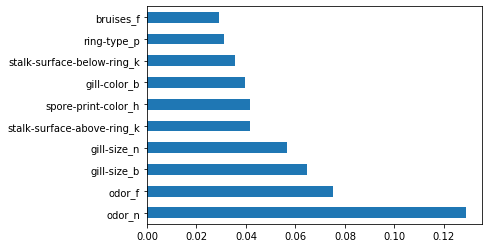

In [138]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

feature_imp = pd.Series(model.feature_importances_, index= X_encoded.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [141]:
best_feat = feature_imp.nlargest(4).index.to_list()
best_feat

['odor_n', 'odor_f', 'gill-size_b', 'gill-size_n']

In [142]:
X_reduced = X_encoded[best_feat]

In [144]:
Xr_scaled = StandardScaler().fit_transform(X_reduced)

In [145]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size = 0.30, 
                                                        random_state = 101)

In [149]:
start = time.process_time()
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train, yr_train)
print(time.process_time() - start)

1.34375


In [150]:
rpred = rmodel.predict(Xr_test)
print(confusion_matrix(yr_test, rpred))
print(classification_report(yr_test, rpred))

[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           e       0.96      0.98      0.97      1274
           p       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



Çok açık bir şekilde görebiliriz ki, eğitim süresi yarı yarıya inerken accuracy'den çok az kaybettik. Aslına bakarsanız bu çok küçük bir veriseti kazancımız 1 saniye kadar fakat bunu milyonlarca satıra sahip bir verisetiyle saatlerce eğittiğiniz bir model olduğunu düşünürseniz kesinlikle gireceğiniz bir tradeoff olacaktır.

## Correlation Matrix

In [151]:
import seaborn as sns

X = data.drop(['class'], axis=1)
y = data['class']
X_encoded = pd.get_dummies(X, prefix_sep="_")
y_encoded = LabelEncoder().fit_transform(y)
X_encoded["Class"] = y_encoded

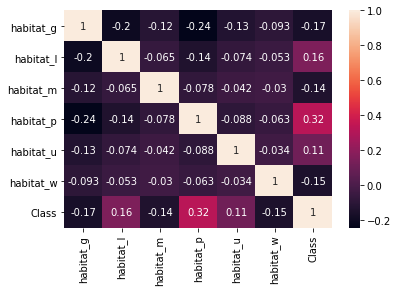

In [157]:
sns.heatmap(X_encoded.iloc[:, -7:].corr(), annot=True);

Belirttiğimiz gibi eksi ve artı değerler güçlü korelasyonu ifade ediyor, burada sayının pozitif ve negatif olması ilişkinin ters veya doğru orantılı olarak değişmesi ile alakalı, her ikisi de bizim için iyi featurelar olabilir bu yüzden dataframe'in mutlak değerini alarak en yüksek değerli olanları getireceğiz.

In [158]:
X_encoded.corr().abs()["Class"].nlargest(10)

Class                         1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises_f                     0.501530
Name: Class, dtype: float64

Bu zamana kadar yazdığımız kısmın sonunda index metodunu ekleyerek sadece kolon isimlerini istiyorum ve bunu ana datasetimizden başka bir değişkene aktarıyorum. Birazdan sadece bu kısmı kullanıyor olacağız, bu sayede daha okunaklı ve en yüksek 10 korelasyon değerine sahip kolon ile birlikte çalışıyor olacağız.

In [159]:
X_reduced_col_names = X_encoded.corr().abs()["Class"].nlargest(10).index
X_encoded[X_reduced_col_names].corr()

,Class,odor_n,odor_f,stalk-surface-above-ring_k,stalk-surface-below-ring_k,ring-type_p,gill-size_n,gill-size_b,gill-color_b,bruises_f
Class,1.000000,-0.785557,0.623842,0.587658,0.573524,-0.540469,0.540024,-0.540024,0.538808,0.501530
odor_n,-0.785557,1.000000,-0.527269,-0.466499,-0.471920,0.352151,-0.457211,0.457211,-0.455399,-0.285171
odor_f,0.623842,-0.527269,1.000000,0.584189,0.600449,-0.427514,-0.055394,0.055394,0.079360,0.344642
stalk-surface-above-ring_k,0.587658,-0.466499,0.584189,1.000000,0.677074,-0.549484,0.095225,-0.095225,0.237814,0.541494
stalk-surface-below-ring_k,0.573524,-0.471920,0.600449,0.677074,1.000000,-0.536122,0.089569,-0.089569,0.249536,0.530549
ring-type_p,-0.540469,0.352151,-0.427514,-0.549484,-0.536122,1.000000,-0.308466,0.308466,-0.507885,-0.767036
gill-size_n,0.540024,-0.457211,-0.055394,0.095225,0.089569,-0.308466,1.000000,-1.000000,0.776903,0.369596
gill-size_b,-0.540024,0.457211,0.055394,-0.095225,-0.089569,0.308466,-1.000000,1.000000,-0.776903,-0.369596
gill-color_b,0.538808,-0.455399,0.079360,0.237814,0.249536,-0.507885,0.776903,-0.776903,1.000000,0.438292
bruises_f,0.501530,-0.285171,0.344642,0.541494,0.530549,-0.767036,0.369596,-0.369596,0.438292,1.000000


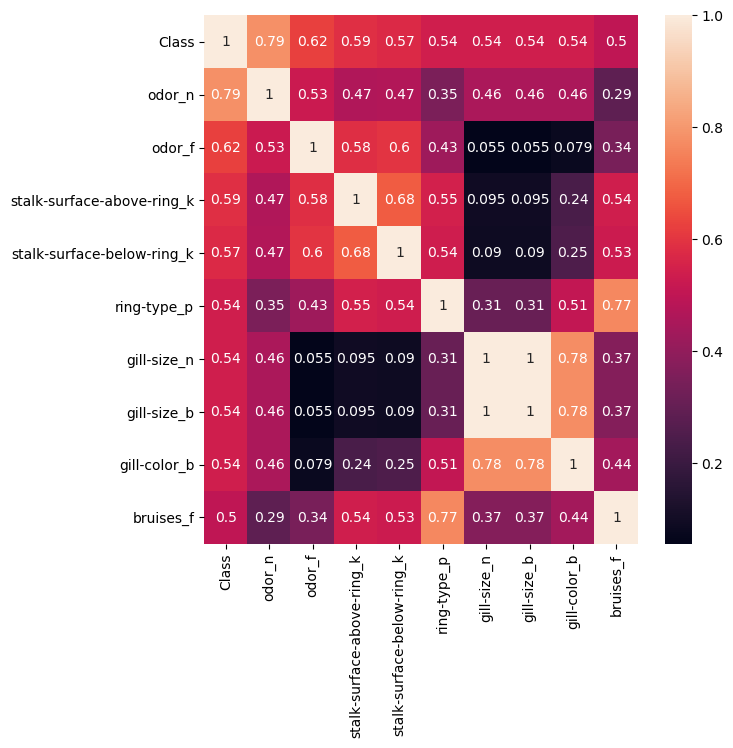

In [165]:
plt.figure(figsize=(7, 7), dpi=100)
sns.heatmap(X_encoded[X_reduced_col_names].corr().abs(), annot=True)